# Loading and training MNIST data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization, Activation, SpatialDropout2D

C:\Users\mdabd\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from keras.datasets import mnist

In [3]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [4]:
np.random.seed(50)
shuffle_indices = np.random.permutation(train_images.shape[0])
train_images = train_images[shuffle_indices]
train_labels = train_labels[shuffle_indices]


val_images = train_images[:10000]
val_labels = train_labels[:10000]
train_images = train_images[10000:]
train_labels = train_labels[10000:]




In [5]:
val_images.shape[0]


10000

In [6]:
train_images.shape[0]


50000

In [7]:
test_images.shape[0]

10000

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
import numpy as np
from tensorflow.keras.optimizers import RMSprop, Adam
import cv2
import keras
from keras.models import Model
from keras.applications import VGG16
from skimage.transform import resize

In [9]:
# Convert labels to categorical
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)

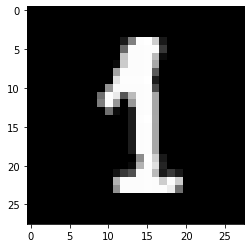

In [10]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')

In [11]:
# Reshape the input images to 3 channels
train_images = np.repeat(train_images[..., np.newaxis], 3, -1)
test_images = np.repeat(test_images[..., np.newaxis], 3, -1)
val_images = np.repeat(val_images[..., np.newaxis], 3, -1)

In [12]:
# Resize the input images to 48x48 to fit VGG16 input size
train_images = np.array([resize(x, (48, 48, 3)) for x in train_images])
test_images = np.array([resize(x, (48, 48, 3)) for x in test_images])
val_images = np.array([resize(x, (48, 48, 3)) for x in val_images])

In [13]:
# Normalize the pixel values
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [68]:


# model = Sequential([
#     Conv2D(filters=64, 
#            kernel_size=(3, 3), 
#            strides=1, 
#            padding='same', 
#            input_shape=(48, 48, 3)),
#     BatchNormalization(),
#     Activation('relu'),
#     Conv2D(filters=64, 
#            kernel_size=(3, 3), 
#            strides=1, 
#            padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     SpatialDropout2D(0.2),

#     Conv2D(filters=128, 
#            kernel_size=(3, 3), 
#            strides=1, 
#            padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
#     Conv2D(filters=128, 
#            kernel_size=(3, 3), 
#            strides=1, 
#            padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     SpatialDropout2D(0.3),

#     Conv2D(filters=256, 
#            kernel_size=(3, 3), 
#            strides=1, 
#            padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
#     Conv2D(filters=256, 
#            kernel_size=(3, 3), 
#            strides=1, 
#            padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
#     Conv2D(filters=256, 
#            kernel_size=(3, 3), 
#            strides=1, 
#            padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     SpatialDropout2D(0.4),

#     Flatten(),
#     Dense(512),
#     BatchNormalization(),
#     Activation('relu'),
#     Dropout(0.5),
#     Dense(128),
#     BatchNormalization(),
#     Activation('relu'),
#     Dropout(0.5),
#     Dense(10, activation='softmax')
# ])

In [69]:
# model.summary()

In [70]:
# model.compile(optimizer=Adam(learning_rate= 0.001),
#             loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [71]:
# history = model.fit(train_images, 
#                     train_labels, 
#                     epochs=20, 
#                     batch_size=1024, 
#                     validation_data=(val_images, val_labels),
#                     verbose=1)

In [72]:
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss per Epoch')
# plt.xlabel('Epoch')

# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [73]:
# # Plot the training and validation accuracy per epoch
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy per Epoch')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# MNIST data training using VGG19

##### Challenges:
Developing the drawing recognition model using the MNIST dataset and VGG19 may have required extensive training and hyperparameter tuning. Ensuring that the model architecture and hyperparameters are appropriately chosen can significantly impact model performance. You likely experimented with different model architectures, activation functions, optimizers, learning rates, and batch sizes to achieve satisfactory accuracy levels.

In [14]:
# Load the pre-trained VGG16 model
vgg19 = keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the layers in VGG16
for layer in vgg19.layers:
    layer.trainable = False

# Add a new classifier on top of the VGG16
# Define the VGG16 model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

80134624/80134624 [==============================] - 22s 0us/step


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 128)               4333696   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [16]:
model.compile(optimizer=Adam(learning_rate= 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
1563/1563 [==============================] - 204s 130ms/step - loss: 0.6472 - accuracy: 0.8037 - val_loss: 0.2704 - val_accuracy: 0.9218
Epoch 2/20
1563/1563 [==============================] - 202s 129ms/step - loss: 0.3594 - accuracy: 0.8927 - val_loss: 0.2154 - val_accuracy: 0.9386
Epoch 3/20
1563/1563 [==============================] - 213s 136ms/step - loss: 0.3164 - accuracy: 0.9059 - val_loss: 0.1942 - val_accuracy: 0.9424
Epoch 4/20
1563/1563 [==============================] - 197s 126ms/step - loss: 0.2957 - accuracy: 0.9096 - val_loss: 0.1741 - val_accuracy: 0.9498
Epoch 5/20
1563/1563 [==============================] - 232s 148ms/step - loss: 0.2757 - accuracy: 0.9163 - val_loss: 0.1691 - val_accuracy: 0.9500
Epoch 6/20
1563/1563 [==============================] - 231s 148ms/step - loss: 0.2677 - accuracy: 0.9187 - val_loss: 0.1609 - val_accuracy: 0.9539
Epoch 7/20
1563/1563 [==============================] - 215s 138ms/step - loss: 0.2604 - accuracy: 0.9224 - val_

# Accuracy Metrics

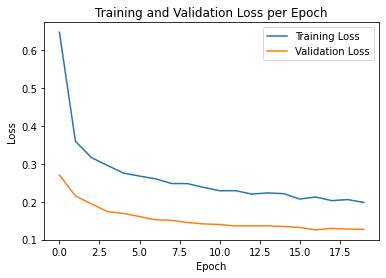

In [18]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')

plt.ylabel('Loss')
plt.legend()
plt.show()

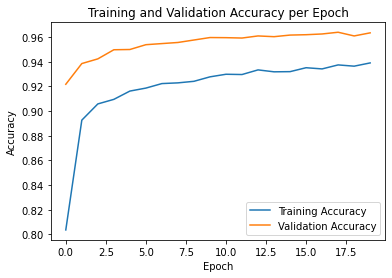

In [19]:
# Plot the training and validation accuracy per epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix

313/313 [==============================] - 6s 18ms/step


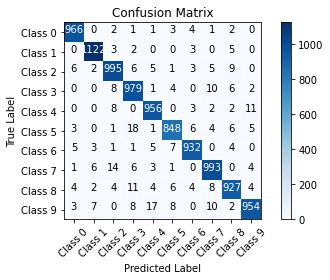

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have the model trained and ready for predictions
  # Your trained model

# Make predictions using the model
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(np.argmax(test_labels, axis=1), predicted_labels)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


# Cross Validation

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
# Define the number of folds for cross-validation
num_folds = 5

# Initialize lists to store the evaluation results
accuracy_scores = []


# Perform cross-validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=50)

# Convert one-hot encoded labels back to categorical labels
train_labels = np.argmax(train_labels, axis=1)
val_labels = np.argmax(val_labels, axis=1)

for train_index, test_index in skf.split(train_images, train_labels):
    # Split data into train and test sets for the current fold
    fold_train_images, fold_test_images = train_images[train_index], train_images[test_index]
    fold_train_labels, fold_test_labels = train_labels[train_index], train_labels[test_index]
    # Evaluate the model on the test data for the current fold
    predictions = model.predict(fold_test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(fold_test_labels, predicted_labels)
    accuracy_scores.append(accuracy)
    
    
    # Compute the mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Print the mean and standard deviation of the accuracy scores
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation Accuracy:", std_accuracy)


313/313 [==============================] - 5s 16ms/step
Mean Accuracy: 0.97604
Standard Deviation Accuracy: 0.0018521339044464374


# Precision and Recall

In [45]:
from sklearn.metrics import classification_report

# Make predictions on test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)  # Assuming you have true labels for test images

# Compute precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels)

print(report)

313/313 [==============================] - 6s 19ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.97      0.95      0.96       892
           6       0.98      0.97      0.97       958
           7       0.96      0.97      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [46]:
import numpy as np
from sklearn.metrics import precision_recall_curve


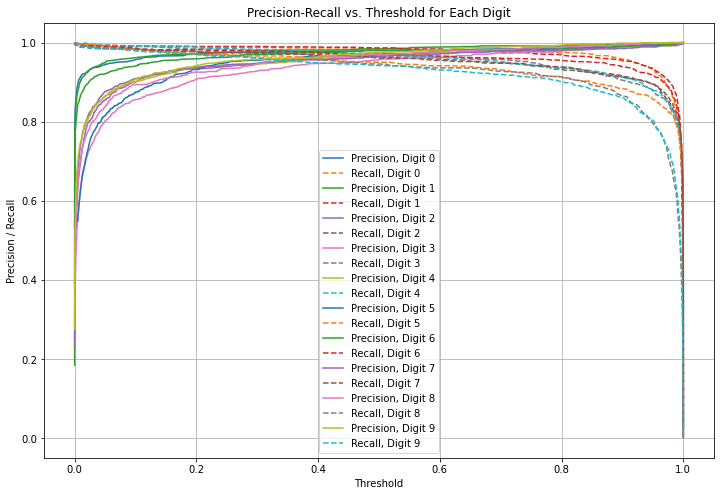

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(12, 8))

for digit in range(10):
    digit_predictions = predictions[:, digit]
    digit_true_labels = (true_labels == digit).astype(int)

    # Compute precision and recall for the current digit
    precision, recall, thresholds = precision_recall_curve(digit_true_labels, digit_predictions)

    # Plot the precision-recall vs. threshold curve for the current digit
    plt.plot(thresholds, precision[:-1], label='Precision, Digit {}'.format(digit))
    plt.plot(thresholds, recall[:-1], label='Recall, Digit {}'.format(digit), linestyle='dashed')

plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.title('Precision-Recall vs. Threshold for Each Digit')
plt.legend()
plt.grid(True)
plt.show()


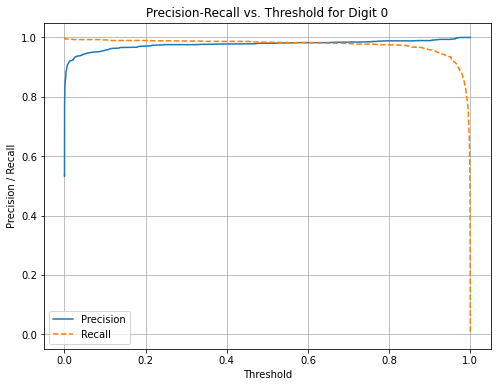

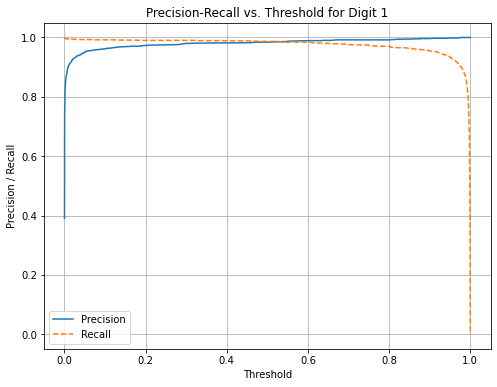

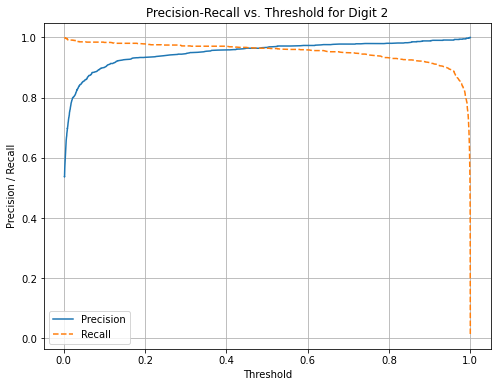

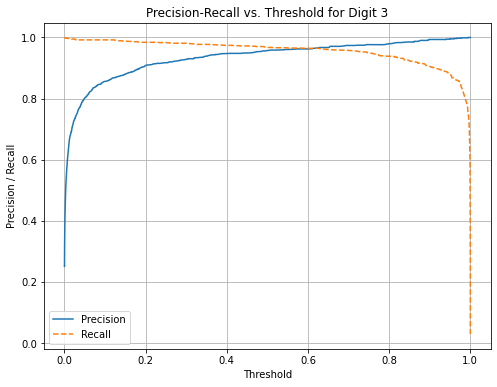

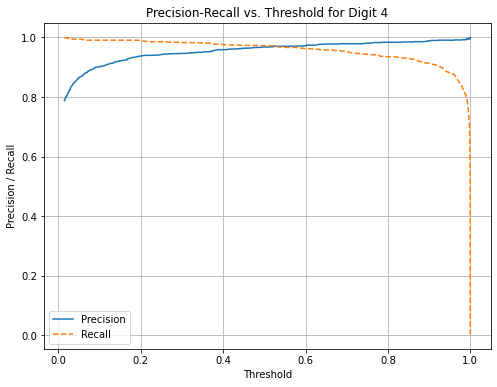

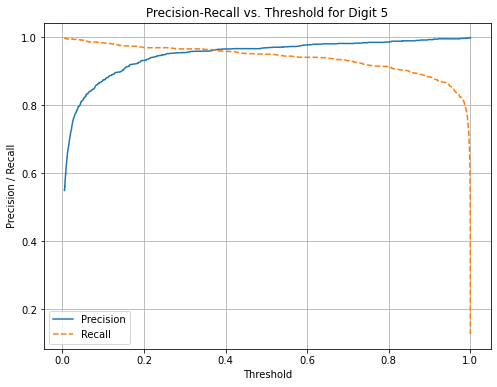

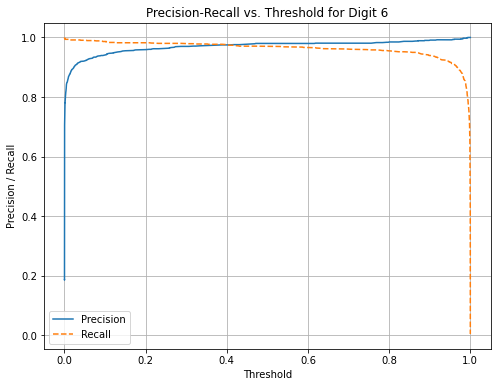

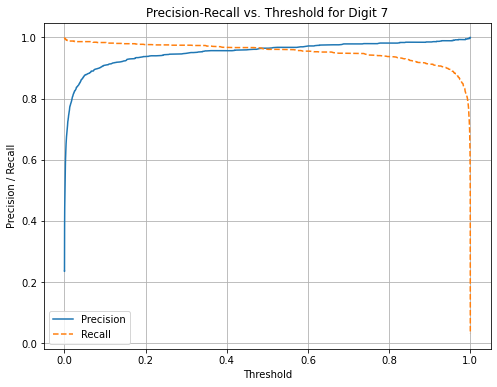

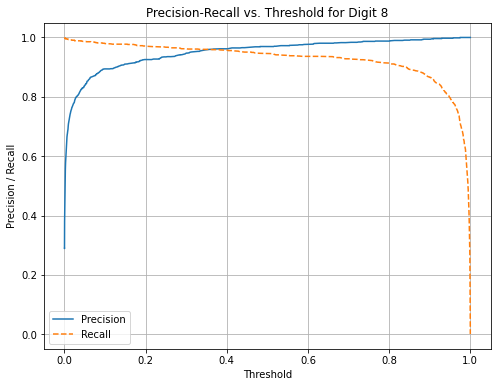

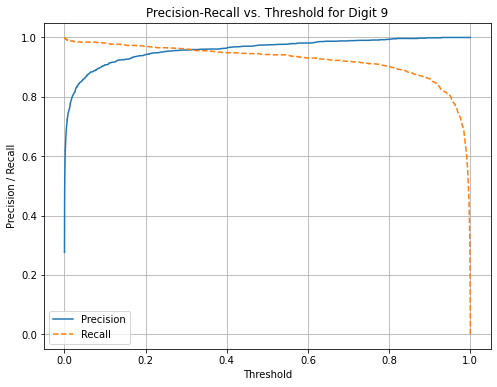

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

for digit in range(10):
    plt.figure(figsize=(8, 6))

    digit_predictions = predictions[:, digit]
    digit_true_labels = (true_labels == digit).astype(int)

    # Compute precision and recall for the current digit
    precision, recall, thresholds = precision_recall_curve(digit_true_labels, digit_predictions)

    # Plot the precision-recall vs. threshold curve for the current digit
    plt.plot(thresholds, precision[:-1], label='Precision')
    plt.plot(thresholds, recall[:-1], label='Recall', linestyle='dashed')

    plt.xlabel('Threshold')
    plt.ylabel('Precision / Recall')
    plt.title('Precision-Recall vs. Threshold for Digit {}'.format(digit))
    plt.legend()
    plt.grid(True)
    plt.show()


313/313 [==============================] - 3s 8ms/step


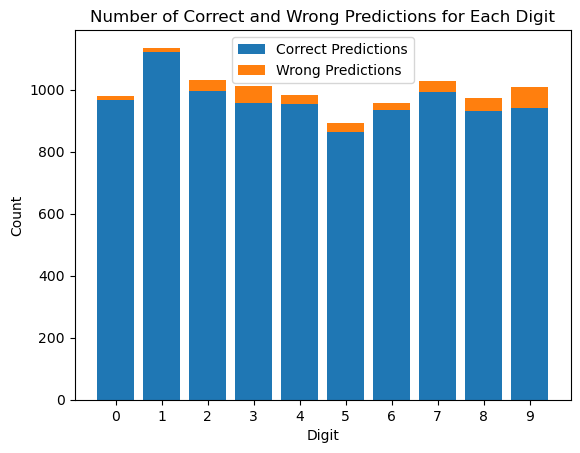

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained and compiled the model

# Make predictions on test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)  # Assuming you have true labels for test images

# Initialize counters for correct and wrong predictions
correct_counts = [0] * 10
wrong_counts = [0] * 10

# Count correct and wrong predictions for each digit
for true_label, predicted_label in zip(true_labels, predicted_labels):
    if true_label == predicted_label:
        correct_counts[true_label] += 1
    else:
        wrong_counts[true_label] += 1

# Plot the counts
digits = range(10)  # Update the range to include all digits from 0 to 9
plt.bar(digits, correct_counts, label='Correct Predictions')
digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.bar(digits, wrong_counts, bottom=correct_counts, label='Wrong Predictions')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Number of Correct and Wrong Predictions for Each Digit')
plt.legend()
plt.show()


313/313 [==============================] - 5s 16ms/step


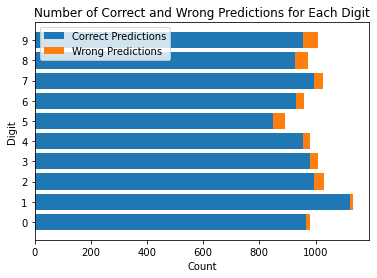

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained and compiled the model

# Make predictions on test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)  # Assuming you have true labels for test images

# Initialize counters for correct and wrong predictions
correct_counts = [0] * 10
wrong_counts = [0] * 10

# Count correct and wrong predictions for each digit
for true_label, predicted_label in zip(true_labels, predicted_labels):
    if true_label == predicted_label:
        correct_counts[true_label] += 1
    else:
        wrong_counts[true_label] += 1

# Plot the counts using horizontal bar graphs
digits = range(10)  # Update the range to include all digits from 0 to 9
plt.barh(digits, correct_counts, label='Correct Predictions')
plt.barh(digits, wrong_counts, left=correct_counts, label='Wrong Predictions')
plt.xlabel('Count')
plt.ylabel('Digit')
plt.title('Number of Correct and Wrong Predictions for Each Digit')
plt.yticks(digits, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.legend()
plt.show()


# Visualizations

313/313 [==============================] - 4s 13ms/step


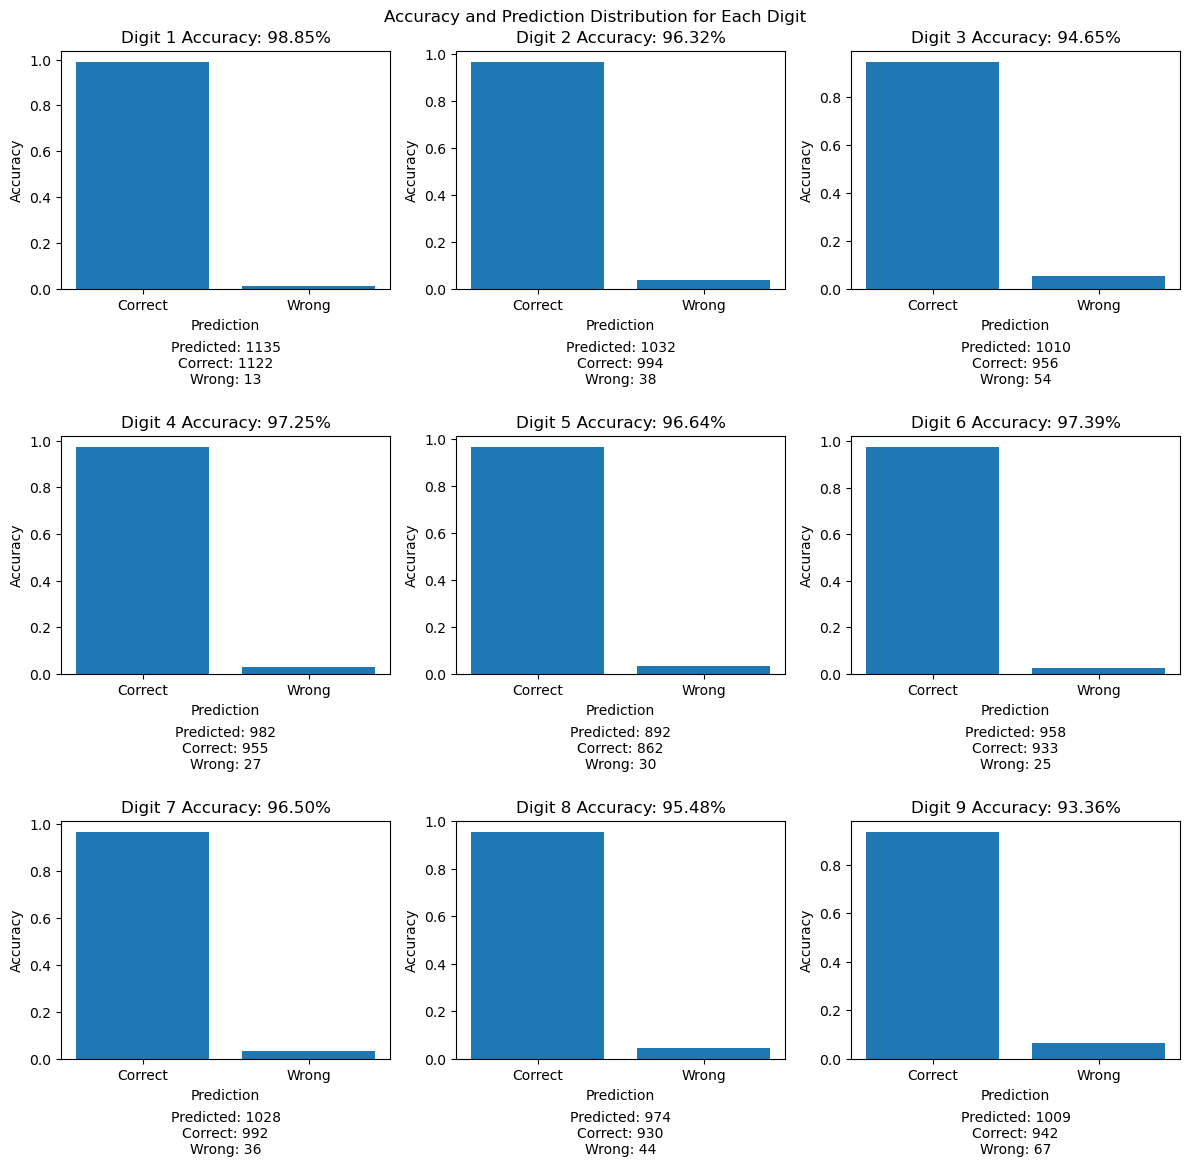

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained and compiled the model

# Make predictions on test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)  # Assuming you have true labels for test images

# Initialize counters for correct and wrong predictions
correct_counts = [0] * 10
wrong_counts = [0] * 10

# Iterate over each prediction
for true_label, predicted_label in zip(true_labels, predicted_labels):
    if true_label == predicted_label:
        correct_counts[true_label] += 1
    else:
        wrong_counts[true_label] += 1

# Create a separate plot for each digit
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
fig.suptitle('Accuracy and Prediction Distribution for Each Digit')

digits = range(1, 10)
row = 0
col = 0

for digit in digits:
    total_count = correct_counts[digit] + wrong_counts[digit]
    accuracy = correct_counts[digit] / total_count if total_count != 0 else 0

    ax = axes[row][col]
    ax.bar(['Correct', 'Wrong'], [accuracy, 1 - accuracy])
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Digit {digit} Accuracy: {accuracy:.2%}')

    ax.text(0.5, -0.4, f'Predicted: {correct_counts[digit] + wrong_counts[digit]}\n'
                       f'Correct: {correct_counts[digit]}\n'
                       f'Wrong: {wrong_counts[digit]}',
            transform=ax.transAxes, horizontalalignment='center')

    col += 1
    if col == 3:
        col = 0
        row += 1

plt.tight_layout()
plt.show()


313/313 [==============================] - 2s 8ms/step


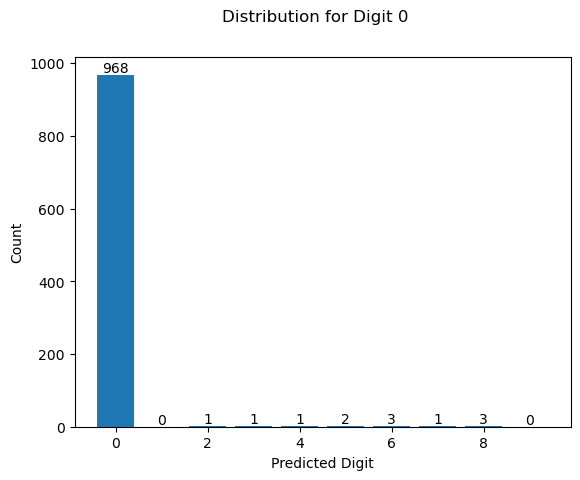

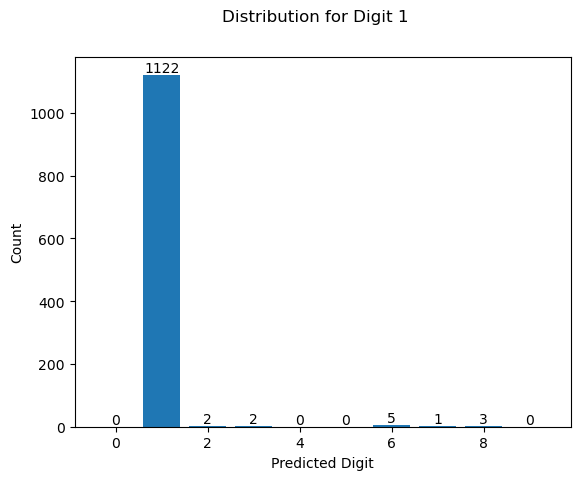

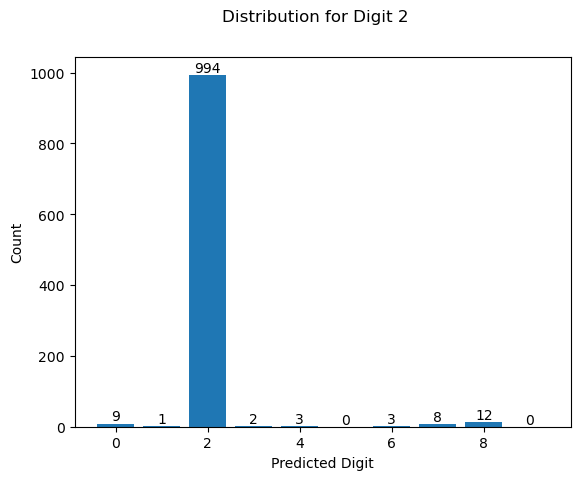

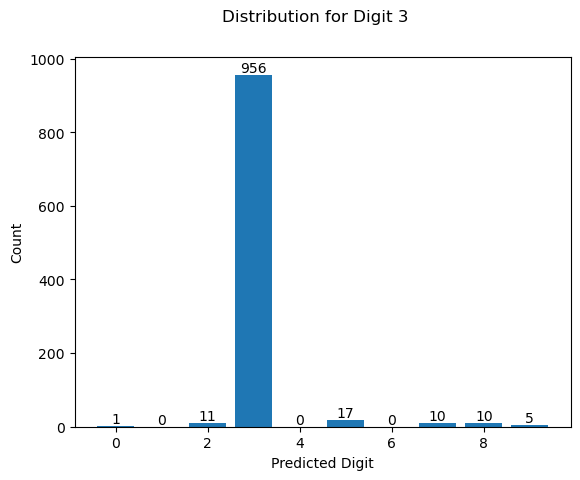

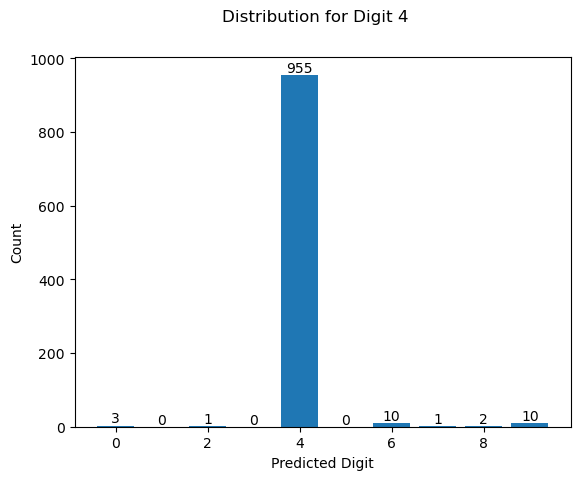

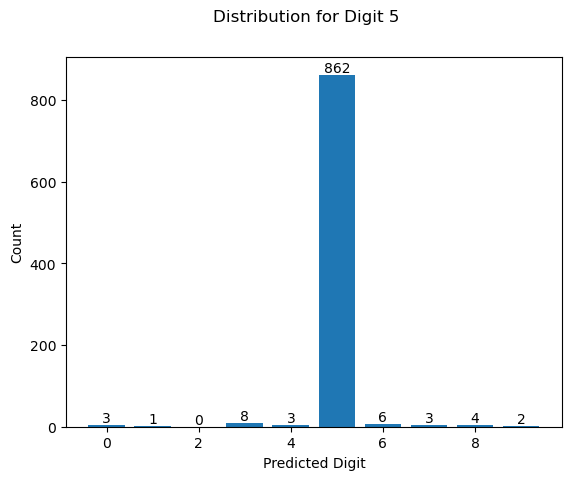

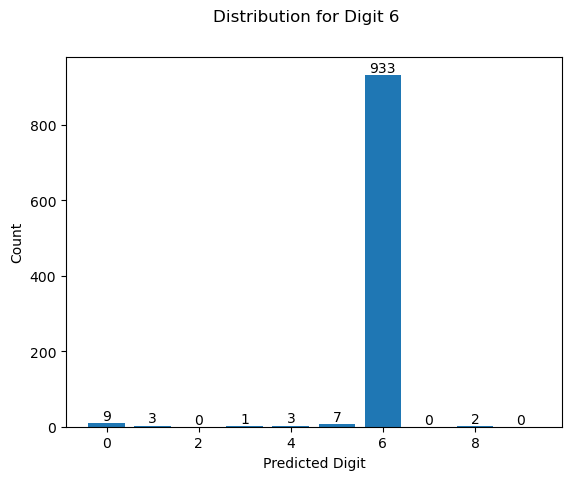

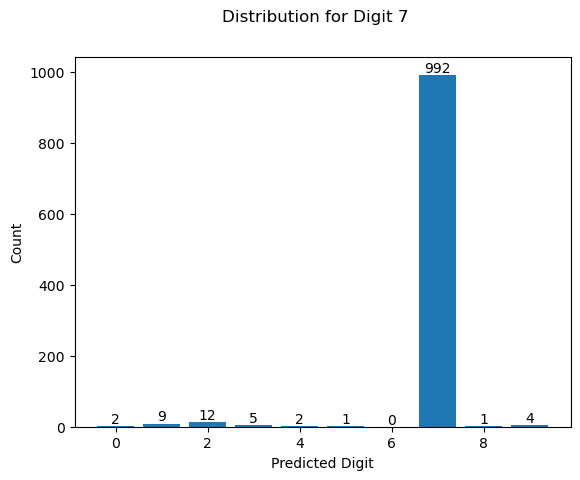

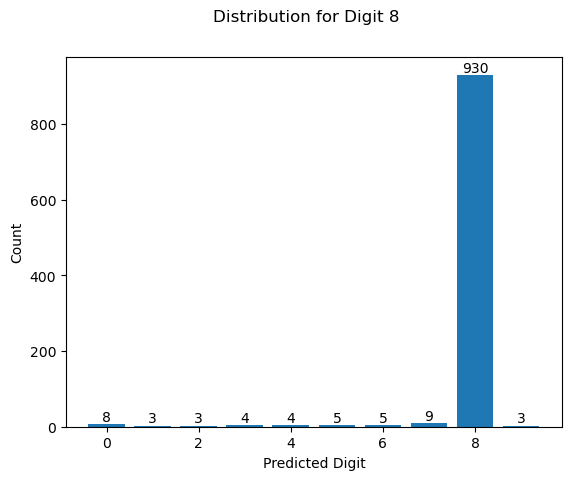

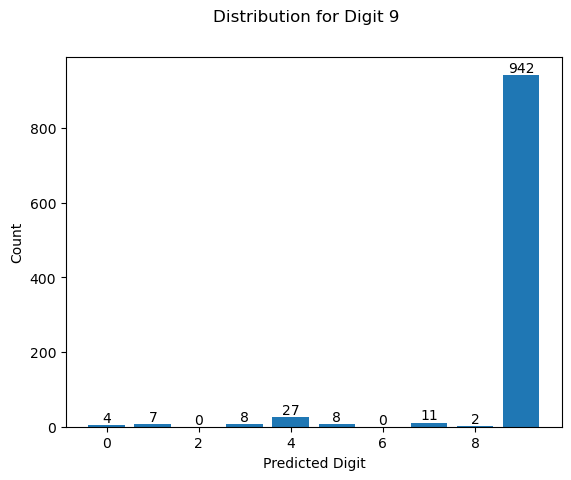

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained and compiled the model

# Make predictions on test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)  # Assuming you have true labels for test images

# Initialize counters for predicted label distribution
predicted_label_counts = [[0] * 10 for _ in range(10)]  # 2D list to store counts for each digit

# Iterate over each prediction
for true_label, predicted_label in zip(true_labels, predicted_labels):
    predicted_label_counts[true_label][predicted_label] += 1

# Create a separate plot for each digit
digits = range(10)

for digit in digits:
    fig, ax = plt.subplots()
    fig.suptitle(f'Distribution for Digit {digit}')

    # Get the count of predicted labels for the current digit
    counts = predicted_label_counts[digit]

    # Plot the distribution of predicted labels
    ax.bar(digits, counts)

    # Annotate the count of each predicted label
    for i, count in enumerate(counts):
        ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')

    ax.set_xlabel('Predicted Digit')
    ax.set_ylabel('Count')

plt.show()


313/313 [==============================] - 5s 14ms/step


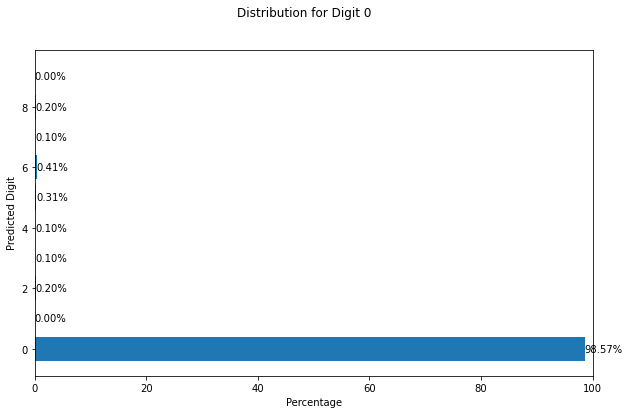

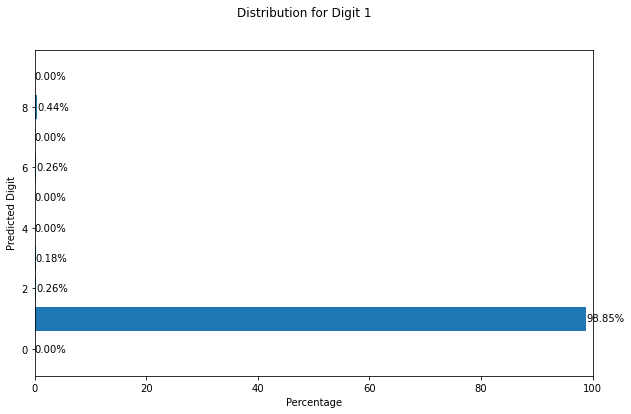

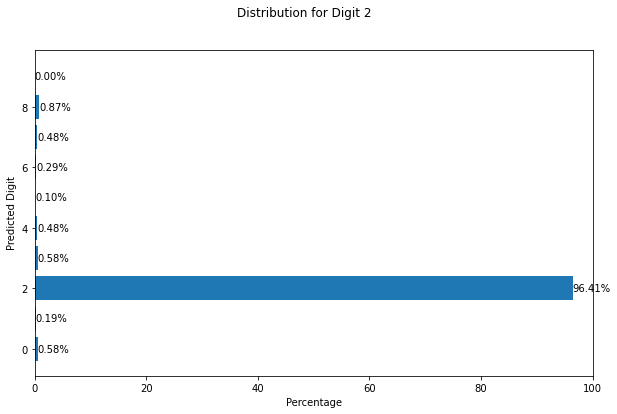

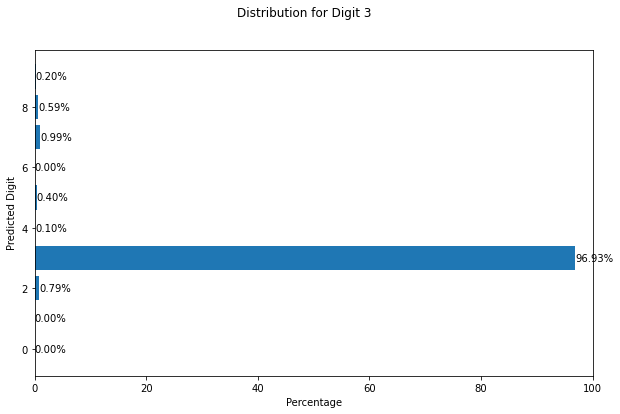

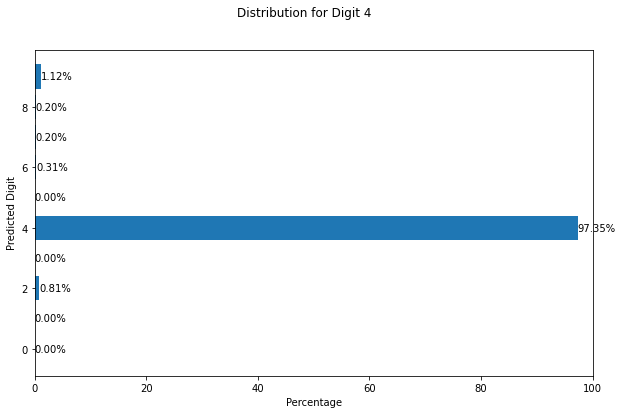

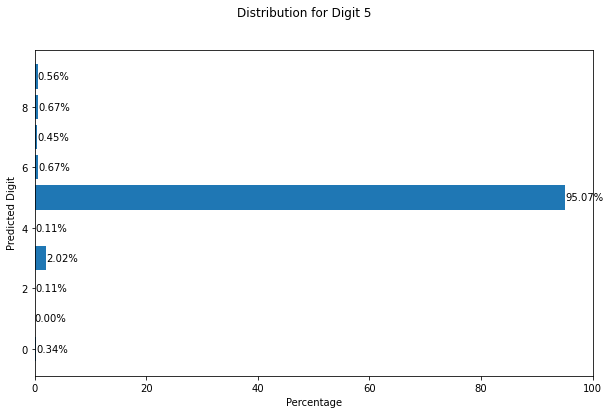

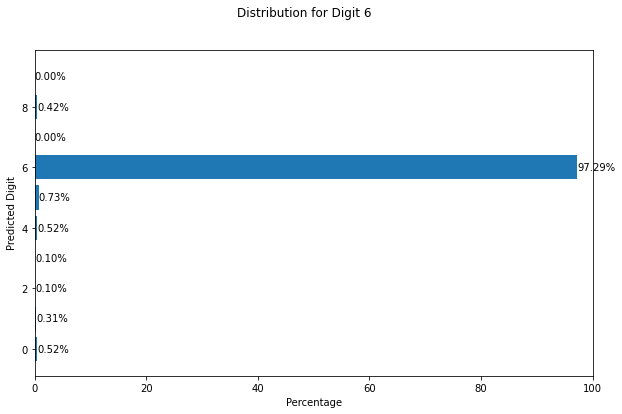

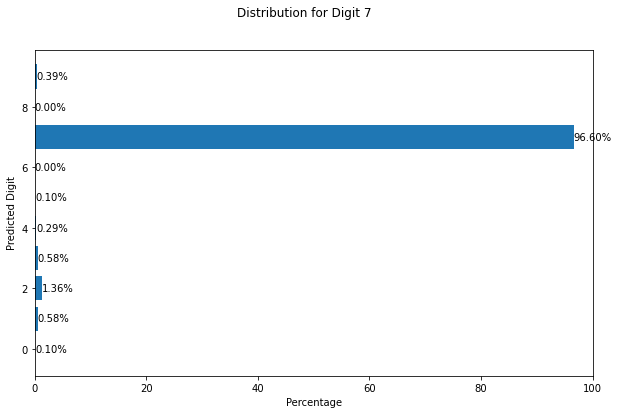

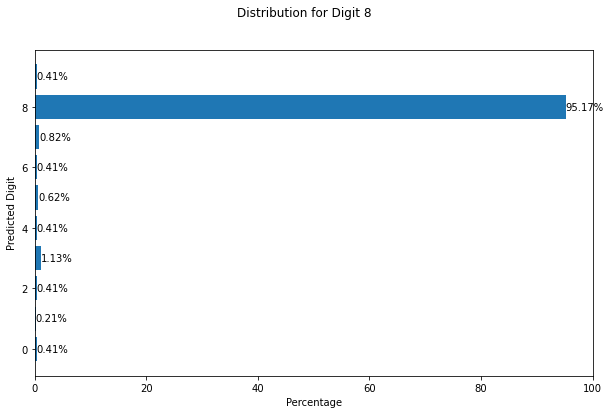

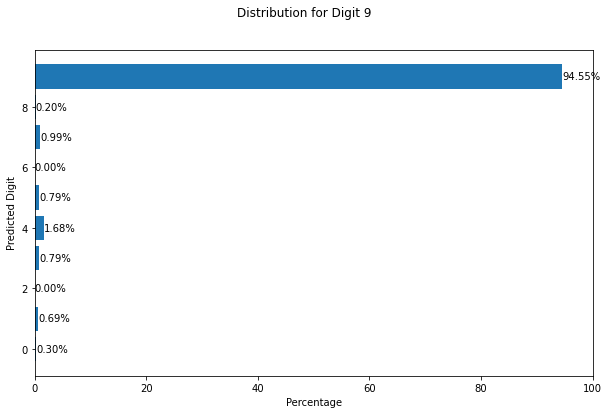

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained and compiled the model

# Make predictions on test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)  # Assuming you have true labels for test images

# Initialize counters for predicted label distribution
predicted_label_counts = [[0] * 10 for _ in range(10)]  # 2D list to store counts for each digit

# Iterate over each prediction
for true_label, predicted_label in zip(true_labels, predicted_labels):
    predicted_label_counts[true_label][predicted_label] += 1

# Create a separate plot for each digit
digits = range(10)

for digit in digits:
    fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size here (width, height)
    fig.suptitle(f'Distribution for Digit {digit}')

    # Get the count of predicted labels for the current digit
    counts = predicted_label_counts[digit]

    # Calculate the total count for the current digit
    total_count = sum(counts)

    # Convert counts to percentages
    percentages = [count / total_count * 100 for count in counts]

    # Plot the horizontal bar chart
    ax.barh(digits, percentages)
    
    # Annotate the percentage values
    for i, percentage in enumerate(percentages):
        ax.annotate(f'{percentage:.2f}%', xy=(percentage, i), ha='left', va='center')

    ax.set_xlabel('Percentage')
    ax.set_ylabel('Predicted Digit')
    ax.set_xlim(0, 100)

plt.show()


In [ ]:
import tensorflow as tf

# Save the trained model in SavedModel format
tf.keras.models.save_model(model, 'model')
